## Machine Learning Zoomcamp 2022 - Mid Term Project

#### Machine learning model to predict wich passengers are transported to an alternate dimension
Problem and data from [Kaggle](https://www.kaggle.com/competitions/spaceship-titanic/overview) competitions

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load of the data to use in the training of the machibne learning model

The data is a set from Kaggle competitions

In [10]:
data = 'https://raw.githubusercontent.com/carrionalfredo/Spaceship-Titanic/main/train.csv'

In [11]:
df = pd.read_csv(data)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
df.shape

(8693, 14)

The data set consists of a record with 8693 rows of info about 14 columns

In [13]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### EDA

In [14]:
df.columns = df.columns.str.lower().str.replace(' ' , '_')

Convert "cryosleep" and "vip" variables to boolean

In [15]:
df.cryosleep = df.cryosleep.astype(bool)
df.vip = df.vip.astype(bool)

Split 'cabin' into 'deck', 'num' and 'side' and concatenate with df

In [16]:
cabin = df['cabin'].str.split('/', expand = True)
cabin.columns = ['deck', 'num', 'side']
cabin.num = pd.to_numeric(cabin.num)

df = pd.concat([df, cabin], axis=1)

drop 'cabin' from df

In [17]:
del df['cabin']

Verifying null and missing data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8693 non-null   bool   
 3   destination   8511 non-null   object 
 4   age           8514 non-null   float64
 5   vip           8693 non-null   bool   
 6   roomservice   8512 non-null   float64
 7   foodcourt     8510 non-null   float64
 8   shoppingmall  8485 non-null   float64
 9   spa           8510 non-null   float64
 10  vrdeck        8505 non-null   float64
 11  name          8493 non-null   object 
 12  transported   8693 non-null   bool   
 13  deck          8494 non-null   object 
 14  num           8494 non-null   float64
 15  side          8494 non-null   object 
dtypes: bool(3), float64(7), object(6)
memory usage: 908.5+ KB


List variable types in categorical, numerical and boolean

In [19]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
boolean = list(df.dtypes[df.dtypes == 'bool'].index)
numerical = list(df.dtypes[df.dtypes == 'float64'].index)

Replace null and na values

In [20]:
df[categorical] = df[categorical].fillna('unk')
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ' , '_')

df['age'] = df['age'].fillna(df['age'].median())
df['age'] = df['age'].replace(0,df['age'].median())
df[numerical] =df[numerical].fillna(0)

Verifiy null values in data frame

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8693 non-null   object 
 2   cryosleep     8693 non-null   bool   
 3   destination   8693 non-null   object 
 4   age           8693 non-null   float64
 5   vip           8693 non-null   bool   
 6   roomservice   8693 non-null   float64
 7   foodcourt     8693 non-null   float64
 8   shoppingmall  8693 non-null   float64
 9   spa           8693 non-null   float64
 10  vrdeck        8693 non-null   float64
 11  name          8693 non-null   object 
 12  transported   8693 non-null   bool   
 13  deck          8693 non-null   object 
 14  num           8693 non-null   float64
 15  side          8693 non-null   object 
dtypes: bool(3), float64(7), object(6)
memory usage: 908.5+ KB


Range of values

In [22]:
df.describe()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,num
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,29.343150,220.009318,448.434027,169.572300,304.588865,298.261820,586.624065
std,13.728128,660.519050,1595.790627,598.007164,1125.562559,1134.126417,513.880084
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,983.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


Target variable

In [23]:
df['transported'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: transported
Non-Null Count  Dtype
--------------  -----
8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB


In [24]:
df['transported'].describe()

count     8693
unique       2
top       True
freq      4378
Name: transported, dtype: object

Mutual Information

In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
def mutual_info_transported_score(series):
        return mutual_info_score(series, df.transported)

mi = df[categorical+boolean].apply(mutual_info_transported_score)
mi.sort_values(ascending=False)

transported    0.693121
passengerid    0.693121
name           0.675740
cryosleep      0.107255
deck           0.023157
homeplanet     0.018931
destination    0.006161
side           0.005271
vip            0.000303
dtype: float64

In [27]:
df[categorical].nunique()

passengerid    8693
homeplanet        4
destination       4
name           8474
deck              9
side              3
dtype: int64

Correlation

In [28]:
df[numerical].corrwith(df.transported)

age            -0.052951
roomservice    -0.241124
foodcourt       0.045583
shoppingmall    0.009391
spa            -0.218545
vrdeck         -0.204874
num            -0.043832
dtype: float64

In [29]:
categorical_columns = ['homeplanet', 'destination', 'deck', 'side', 'cryosleep', 'vip', 'transported']

### Prepairing selected data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_fulltrain, df_test = train_test_split(df[categorical_columns+numerical], test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_fulltrain[categorical_columns+numerical], test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.transported.values
y_val = df_val.transported.values
y_test = df_test.transported.values

del df_train['transported']
del df_val['transported']
del df_test['transported']

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
train_dicts= df_train.to_dict(orient='records')
val_dicts= df_val.to_dict(orient='records')

In [34]:
dv = DictVectorizer(sparse= False)
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [35]:
dv.get_feature_names()

j:\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'cryosleep',
 'deck=a',
 'deck=b',
 'deck=c',
 'deck=d',
 'deck=e',
 'deck=f',
 'deck=g',
 'deck=t',
 'deck=unk',
 'destination=55_cancri_e',
 'destination=pso_j318.5-22',
 'destination=trappist-1e',
 'destination=unk',
 'foodcourt',
 'homeplanet=earth',
 'homeplanet=europa',
 'homeplanet=mars',
 'homeplanet=unk',
 'num',
 'roomservice',
 'shoppingmall',
 'side=p',
 'side=s',
 'side=unk',
 'spa',
 'vip',
 'vrdeck']

### Training model

In [36]:
val_scores = []
test_scores = []
models = []

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Simple Logistic regression (max_iter=2000, class_weight='balanced')

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
models.append('Simple Logistic Reg.')

In [40]:
x_train = dv.fit_transform(train_dicts)

In [41]:
x_val = dv.transform(val_dicts)

In [42]:
lgr_scores =[]
for C in range(1, 11, 1):
    lgr=LogisticRegression(max_iter=2000, C=C, class_weight='balanced')
    lgr.fit(x_train, y_train)
    y_pred_val = lgr.predict_proba(x_val)[:,1]
    val_AUC = roc_auc_score(y_val, y_pred_val)
    lgr_scores.append((C, val_AUC))

pd.DataFrame(lgr_scores, columns= ['C', 'auc']).sort_values(by='auc', ascending=False)

,C,auc
5,6,0.883357
3,4,0.883244
8,9,0.883141
0,1,0.883109
2,3,0.883012
9,10,0.882922
6,7,0.882916
7,8,0.882897
4,5,0.882795
1,2,0.882772


In [43]:
C=6

Final Logistic regression model

In [44]:
lgr=LogisticRegression(max_iter=2000, C=C, class_weight='balanced')

In [45]:
lgr.fit(x_train, y_train)

LogisticRegression(C=6, class_weight='balanced', max_iter=2000)

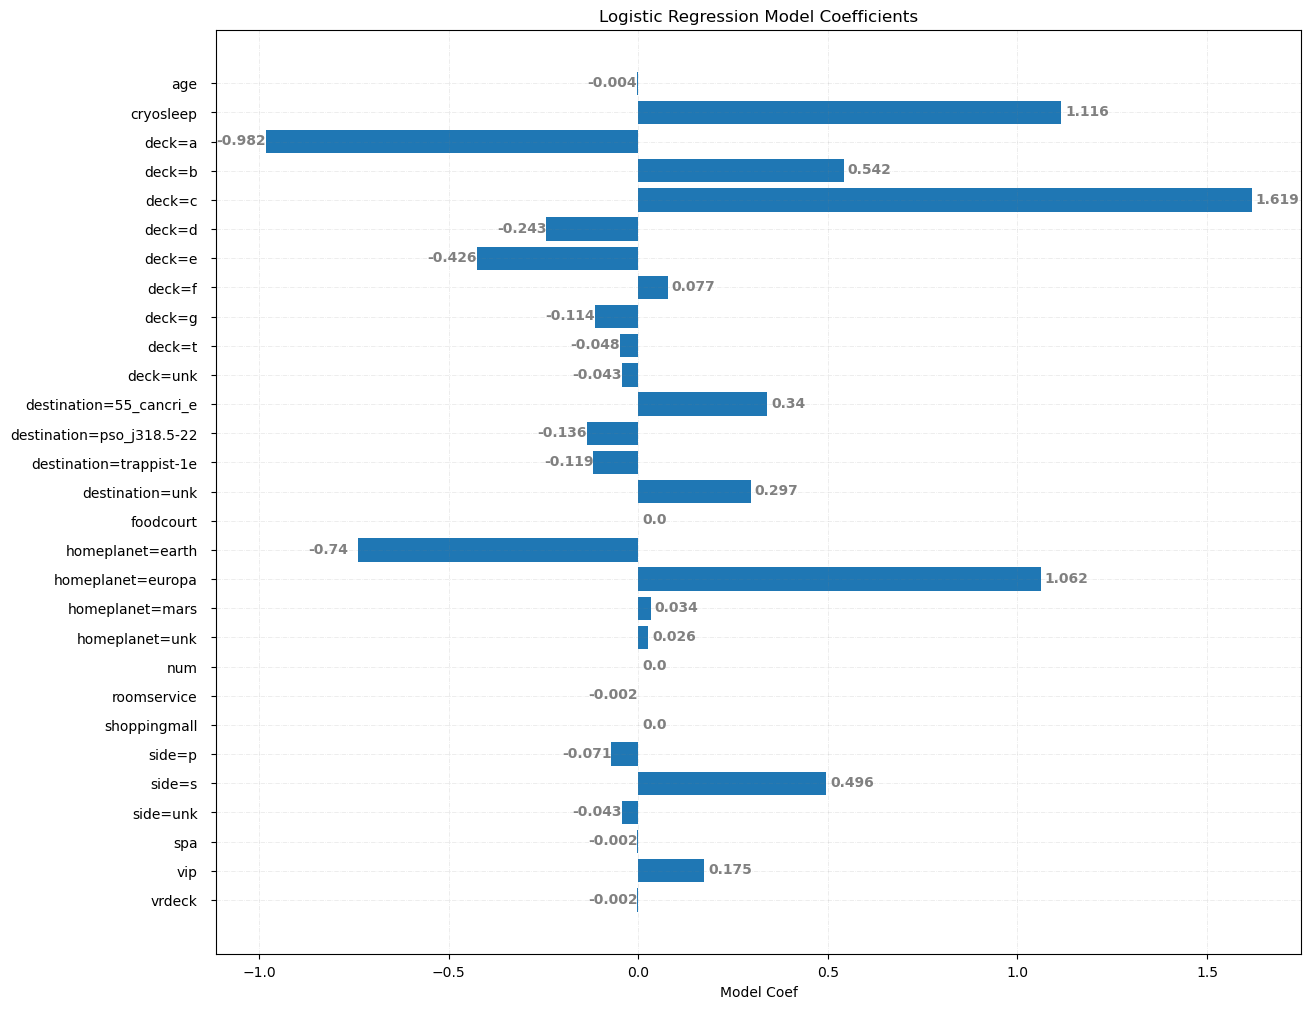

In [46]:
fig, ax = plt.subplots(figsize=(14, 12))

ax.barh(dv.get_feature_names_out(),lgr.coef_[0], height=0.8)

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)

ax.invert_yaxis()

for i in ax.patches:
    if i.get_width() >0:
        plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 3)),
             fontsize=10, fontweight='bold',
             color='grey')
    else:
        plt.text(i.get_width()-0.13, i.get_y()+0.5,
             str(round((i.get_width()), 3)),
             fontsize=10, fontweight='bold',
             color='grey')

plt.xlabel('Model Coef')
plt.title('Logistic Regression Model Coefficients')

plt.savefig('images/Fig_01.png')

Validation run

In [47]:
x_val = dv.transform(val_dicts)
y_pred_val = lgr.predict_proba(x_val)[:,1]

In [48]:
val_AUC = roc_auc_score(y_val, y_pred_val)
val_scores.append(val_AUC)
val_AUC

0.8833572072789008

Test run

In [49]:
test_dicts= df_test.to_dict(orient='records')
x_test = dv.transform(test_dicts)
y_pred_test = lgr.predict_proba(x_test)[:,1]

In [50]:
test_AUC = roc_auc_score(y_test, y_pred_test)
test_scores.append(test_AUC)
test_AUC

0.8823954626334519

AUC Comparison

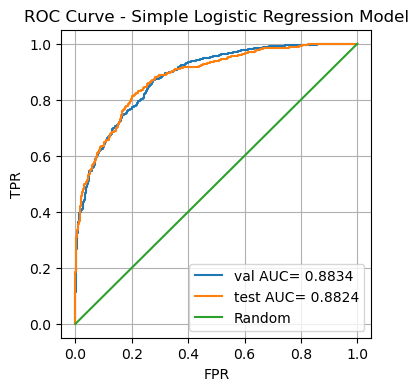

In [51]:
fpr_v, tpr_v, thresholds_v = roc_curve(y_val, y_pred_val)
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_pred_test)

plt.figure(figsize= (4,4))

plt.plot(fpr_v, tpr_v, label = (f'val AUC= {round(val_AUC,4)}'))
plt.plot(fpr_t, tpr_t, label = (f'test AUC= {round(test_AUC,4)}'))
plt.plot([0, 1], [0, 1], label= 'Random')

plt.title('ROC Curve - Simple Logistic Regression Model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(which='both')
plt.legend()

plt.savefig('images/Fig_02.png')

#### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
models.append('Decision Tree Classifier')

In [54]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

Validation run

In [55]:
y_pred_val = dt.predict_proba(x_val)[:, 1]

val_AUC = roc_auc_score(y_val, y_pred_val)
val_AUC

0.7404497586078838

Veryfing overfit

In [56]:
y_pred = dt.predict_proba(x_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.999999337895089

Parameters tunnig

In [57]:
dt_scores =[]
for depth in range(4,11,1):
    for samples in range(10,21,2):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples)
        dt.fit(x_train, y_train)
        
        y_pred = dt.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        dt_scores.append((depth, samples, auc))

In [58]:
df_scores_pivot = pd.pivot_table(pd.DataFrame(dt_scores, columns=['max_depth', 'min_samples_leaf', 'auc']),values ='auc', index=['min_samples_leaf'], columns='max_depth')

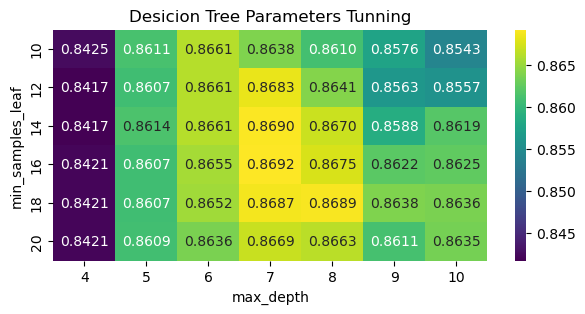

In [59]:
df_scores_pivot = pd.pivot_table(
    pd.DataFrame(
        dt_scores,
        columns=['max_depth', 'min_samples_leaf', 'auc']
        ),
    values ='auc',
    index=['min_samples_leaf'],
    columns='max_depth'
    )

fig_pivot, ax = plt.subplots(figsize=(7,3))

sns.heatmap(df_scores_pivot, annot=True, fmt= '.4f', cmap='viridis')
ax.set(xlabel="max_depth", ylabel="min_samples_leaf", title='Desicion Tree Parameters Tunning')
ax.xaxis.tick_bottom()

plt.savefig('images/Fig_03.png')

In [60]:
max_depth = 7
min_samples_leaf = 14

Final decision tree model

In [61]:
dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14)

In [62]:
from sklearn import tree
from sklearn.tree import export_text

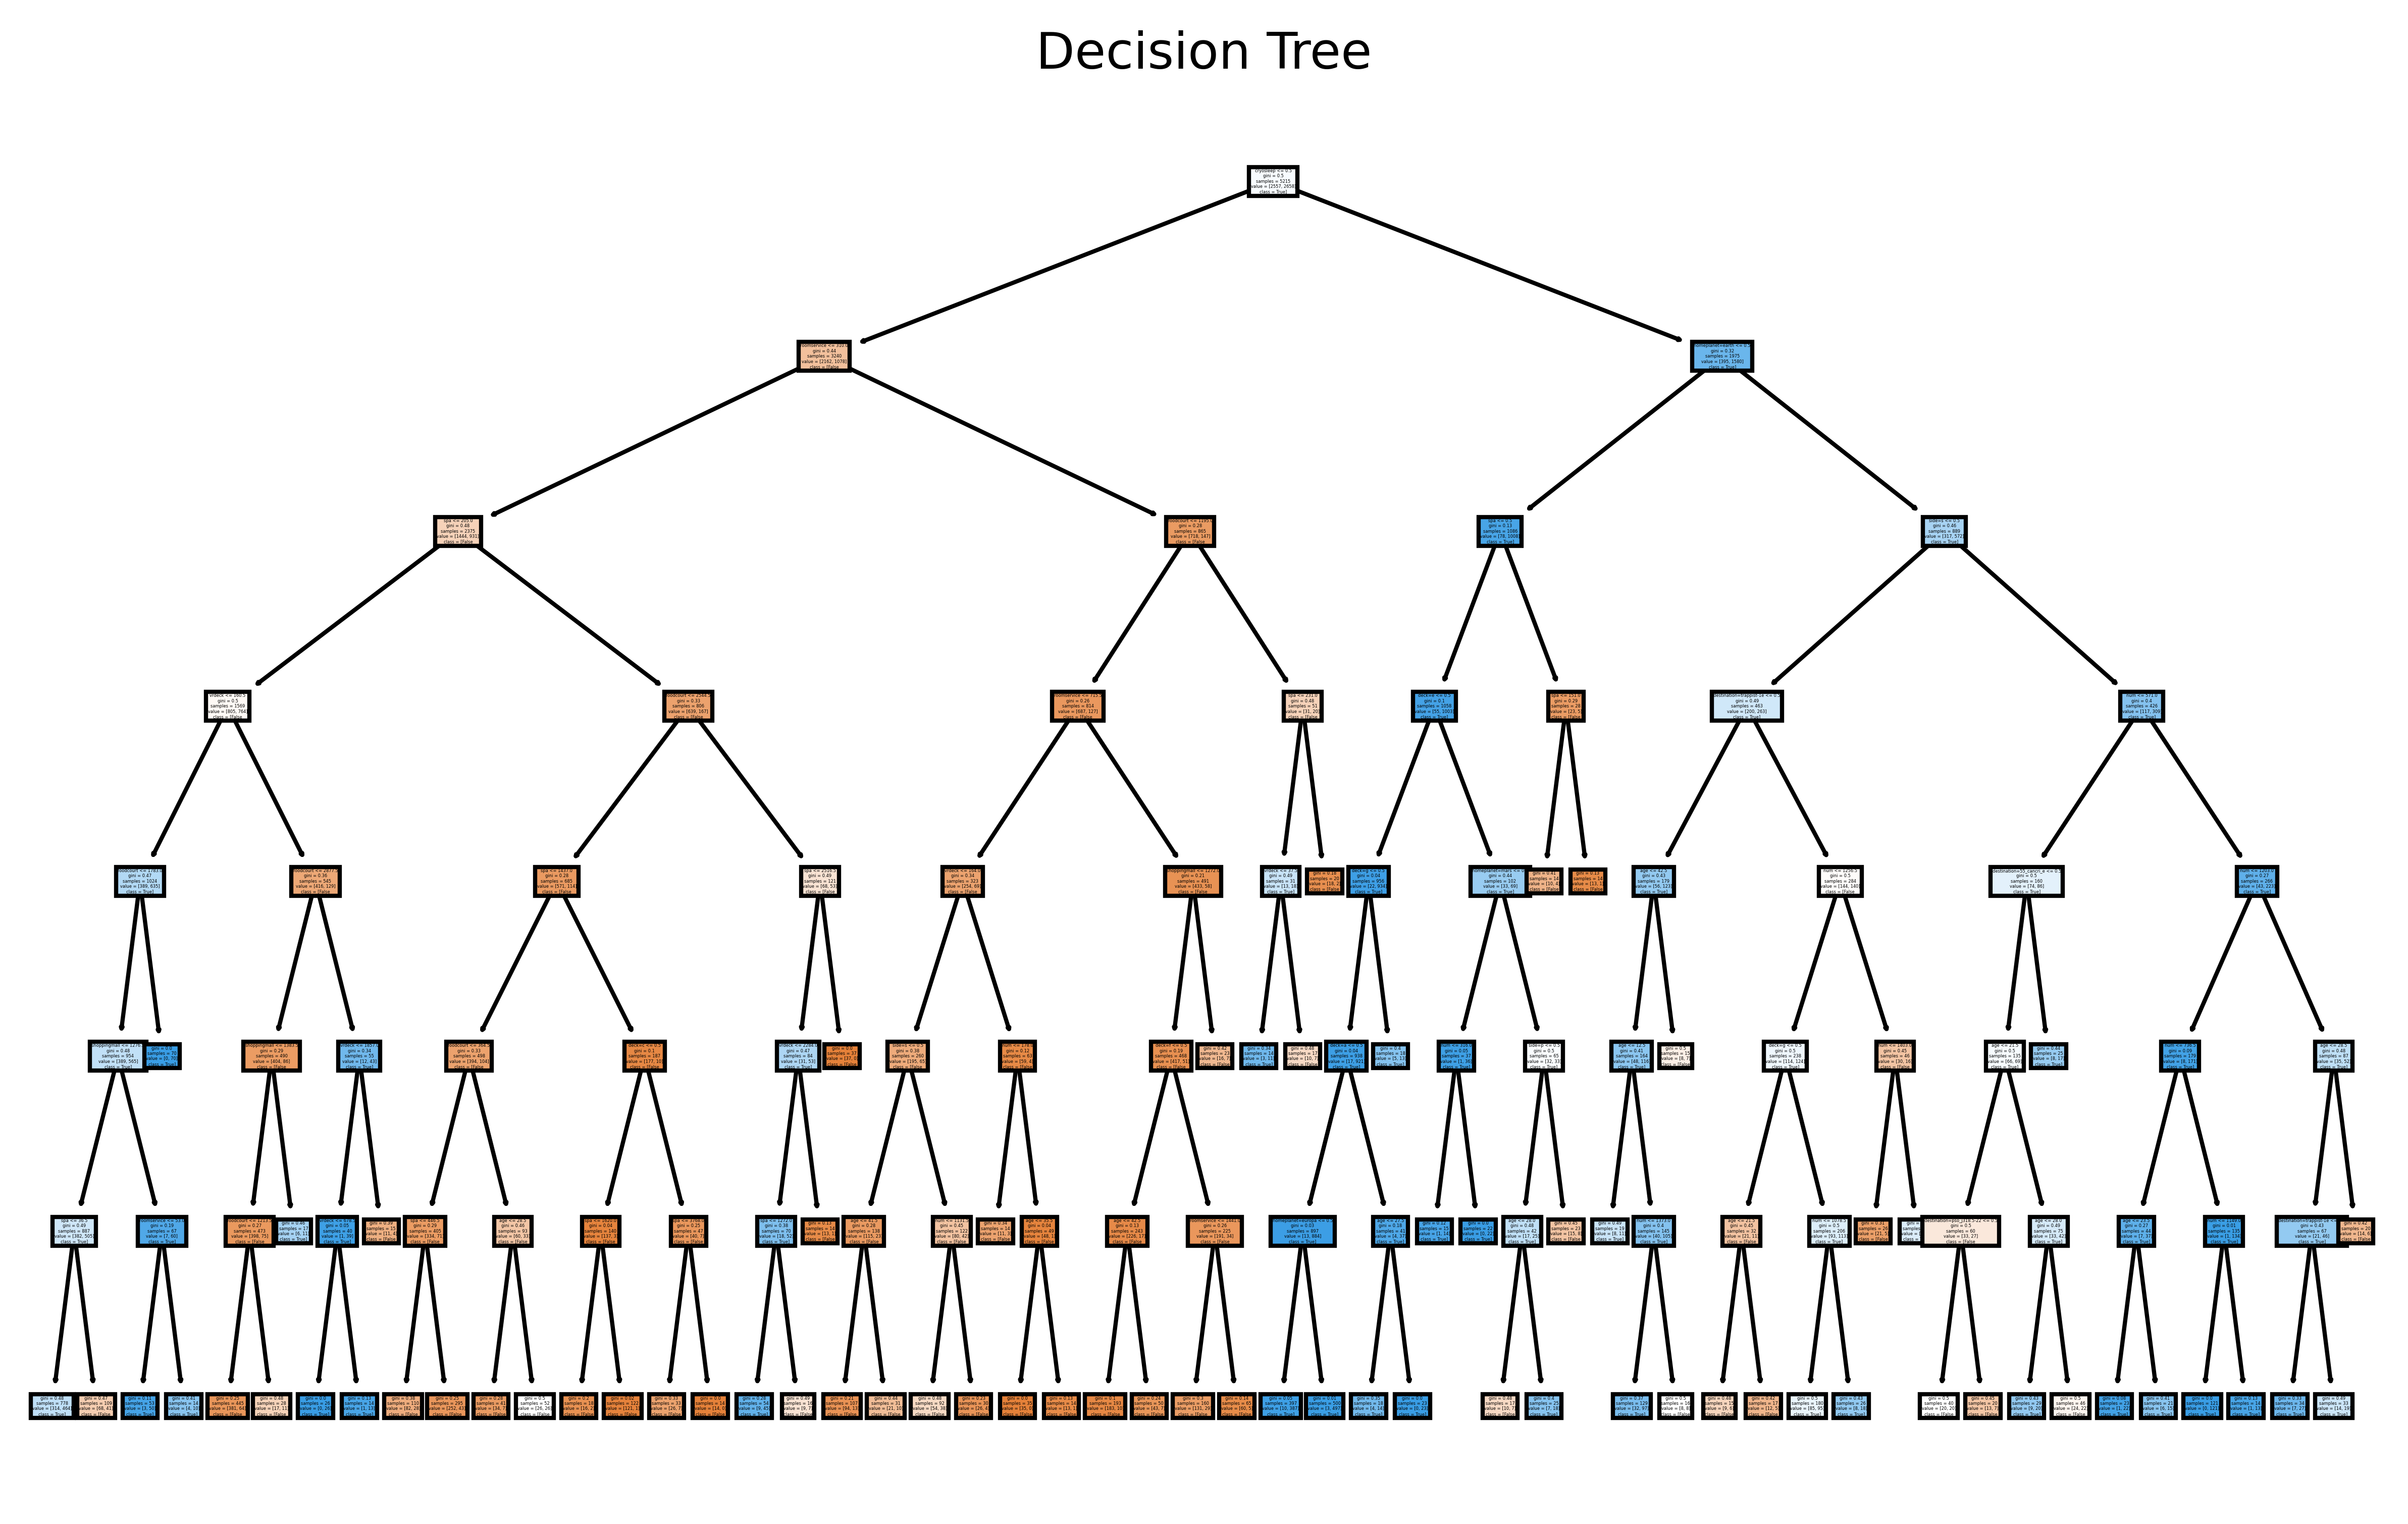

In [63]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=600)
tree.plot_tree(
    dt,
    feature_names = dv.get_feature_names_out(),
    class_names=str(dt.classes_).split(),
    filled = True,
    precision = 2
    );

plt.title('Decision Tree')
fig.savefig('images/Fig_04.png')

Validation run

In [64]:
y_pred_val = dt.predict_proba(x_val)[:, 1]
val_AUC = roc_auc_score(y_val, y_pred_val)
val_scores.append(val_AUC)
val_AUC

0.8689327020001061

Test run

In [65]:
y_pred_test = dt.predict_proba(x_test)[:, 1]
test_AUC = roc_auc_score(y_test, y_pred_test)
test_scores.append(test_AUC)
test_AUC

0.8667843638790037

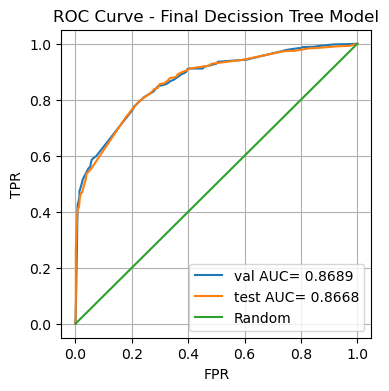

In [66]:
fpr_v, tpr_v, thresholds_v = roc_curve(y_val, y_pred_val)
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_pred_test)

plt.figure(figsize= (4,4))

plt.plot(fpr_v, tpr_v, label = (f'val AUC= {round(val_AUC,4)}'))
plt.plot(fpr_t, tpr_t, label = (f'test AUC= {round(test_AUC,4)}'))
plt.plot([0, 1], [0, 1], label= 'Random')

plt.title('ROC Curve - Final Decission Tree Model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(which='both')
plt.legend()

plt.savefig('images/Fig_05.png')

#### Random Forest 

In [67]:
models.append('Random Forest')

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_scores = []
for s in range(1,6,1):
    for n in range(10, 151, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(x_train, y_train)

        y_pred = rf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        rf_scores.append((s, n, auc))

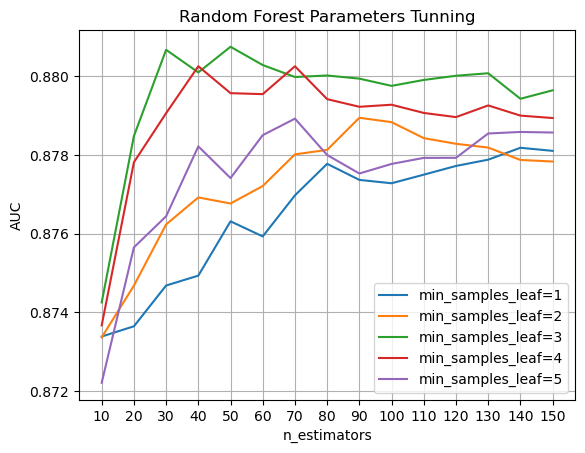

In [70]:
df_scores = pd.DataFrame(rf_scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

for s in range(1,6,1):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'min_samples_leaf=%d' % s)

    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title('Random Forest Parameters Tunning')
    plt.xticks(range(10,151,10))
    plt.grid(which='both')
    plt.legend()


plt.savefig('images/Fig_06.png')

Final Random Forest Classifier

In [71]:
min_samples_leaf = 3
n_stimators = 30

In [72]:
rf = RandomForestClassifier(n_estimators=n_stimators,
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, n_estimators=30,
                       random_state=1)

Validation run

In [73]:
y_pred_val = rf.predict_proba(x_val)[:, 1]
val_AUC = roc_auc_score(y_val, y_pred_val)
val_scores.append(val_AUC)
val_AUC

0.8806727147328772

Test run

In [74]:
y_pred_test = rf.predict_proba(x_test)[:, 1]
test_AUC = roc_auc_score(y_test, y_pred_test)
test_scores.append(test_AUC)
test_AUC

0.8733166253601086

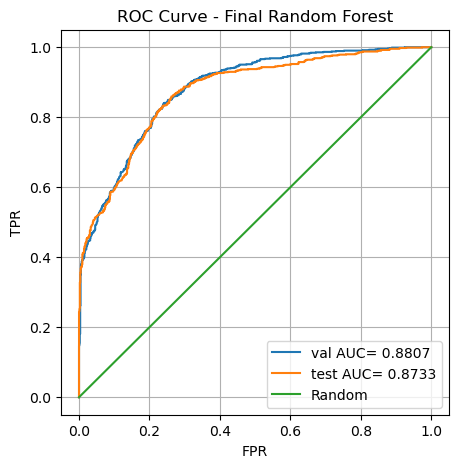

In [75]:
fpr_v, tpr_v, thresholds_v = roc_curve(y_val, y_pred_val)
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_pred_test)

plt.figure(figsize= (5,5))

plt.plot(fpr_v, tpr_v, label = (f'val AUC= {round(val_AUC,4)}'))
plt.plot(fpr_t, tpr_t, label = (f'test AUC= {round(test_AUC,4)}'))
plt.plot([0, 1], [0, 1], label= 'Random')

plt.title('ROC Curve - Final Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(which='both')
plt.legend()

plt.savefig('images/Fig_07.png')

### Final models comparison

In [76]:
pd.DataFrame((val_scores, test_scores),
                         columns=models,
                         index=['Validation', 'Test']
                                ).style.highlight_max(axis=1)

,Simple Logistic Reg.,Decision Tree Classifier,Random Forest
Validation,0.883357,0.868933,0.880673
Test,0.882395,0.866784,0.873317


#### The model selected is:
#### LogisticRegression(max_iter=2000, C=6, class_weight='balanced')